<nav class="navbar navbar-default">
  <div class="container-fluid">
    <div class="navbar-header" style="float: left">
        <a class="navbar-brand" href="0_Index.ipynb" target="_self"> <h2> &uarr; Back to front page</h2></a>
    </div>
  </div>
</nav>

# Sinusoids and their frequency representation

Probably the most fundamental concept in the discipline of Signal Processing is the sinusoid (term for sine-shaped wave). We will define a siusoid mathematically with the formula
## $$x(t) = A \cdot \cos \left(2\pi \cdot f \cdot t + \phi\right) $$
where $A$ is the wave amplitude, $f$ is the frequency and $\phi$ is the phase component. 

The reason for the emphasis on sinusoids in signal processing is most (if not all) frequency analysis is founded on decomposing any signal into a sum of component sinusoids. When viewing the magnitude spectrum of any signal $s(t)$, the level shown in the frequency curve for a given point $f$ along the x-axis (frequency) tells us how much of the signal can be attributed to a sinusoid with the exact frequency $f$.

Below is an example of python code to generate a signal $x(t)$ (`xt`) consisting solely of one sinusoid with frequency $f_1=1$Hz, amplitude $A_1 = 1$, and phase $\phi_1 = -\frac{\pi}{3}$. Once the signal `xt` is created, we use `matplotlib.pyplot` to present both a view of the shape of $x(t)$ in the time domain, and it's corresponding magnitude spectrum $|X(f)|$ in the frequency domain. What is important to note, is that the magnitude spectrum of $x(t)$ is equal to zero for all frequencies *except* for $f = 1$Hz, as represented by the sudden spike. 

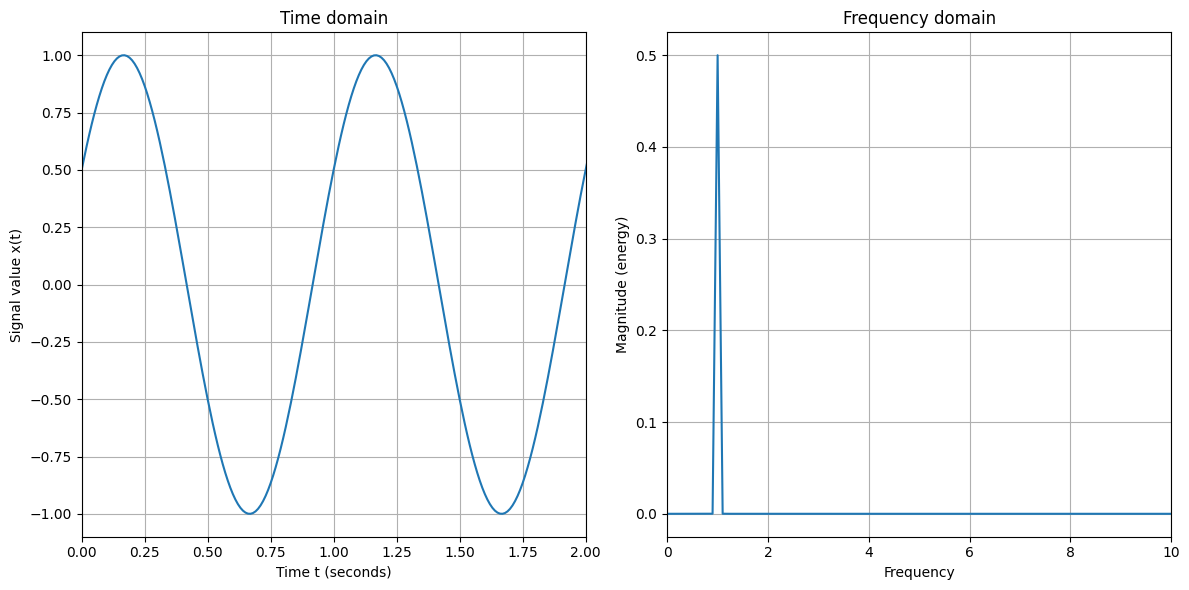

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Generate Signal!
fs = 100  # Sampling Frequency
T = 20   # Signal Duratino'
A1 = 1   # Amplitude
F1 = 1   # Wave frequency
phi1 = -np.pi/3  # Phase
t = np.linspace(0, T, T*fs, endpoint=False) # Create array of time values
xt = A1*np.cos(2*np.pi*F1*t+phi1) # Create sinusoid signal

plt.figure(figsize=(12,6)) # Create "blank" figue of specified size

# PLot sinusoid in time domain
plt.subplot(1,2,1)
plt.plot(t, xt)
plt.xlim([0, T/10]) # Zoom in on x-axis
plt.xlabel("Time t (seconds)")
plt.ylabel("Signal value x(t)")
plt.title("Time domain")
plt.grid(True)
plt.subplot(1,2,2)

# Plot sinusoid in frequency domain
plt.magnitude_spectrum(xt, fs) # argument 'fs' required for x-axis to represent Hertz(Hz)
plt.xlim([0, fs/10]) # Zoom in on x-axis
plt.title("Frequency domain")
plt.grid(True)
plt.tight_layout() # Make room for axis labels

## a)

Using the above example as a template, add two new frequency components to the signal $x(t)$. Their properties are as follows:

|Frequency $f$ (Hz)|Amplitude $A$|Phase $\phi$ (radians)|
|---|---|---|
|$3$|$\frac{1}{3}$|$0$|
|$5$|$\frac{1}{5}$|$\frac{\pi}{3}$|

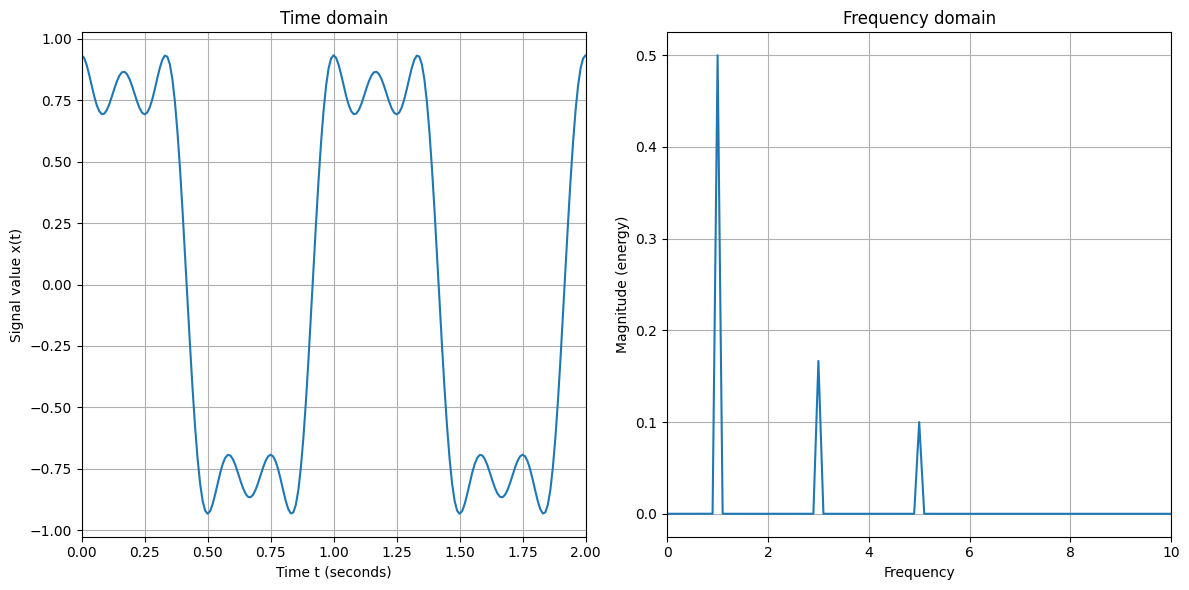

In [75]:
# Generate Signal!
A2 = 1/3   # Amplitude
F2 = 3   # Wave frequency
phi2 = 0  # Phase
xt1 = A2*np.cos(2*np.pi*F2*t+phi2) # Create sinusoid signal

# Generate Signal!
A3 = 1/5   # Amplitude
F3 = 5   # Wave frequency
phi3 = np.pi/3  # Phase
xt2 = A3*np.cos(2*np.pi*F3*t+phi3) # Create sinusoid signal

newXt = xt.copy() + xt1.copy() + xt2.copy()

plt.figure(figsize=(12,6)) # Create "blank" figue of specified size

# PLot sinusoid in time domain
plt.subplot(1,2,1)
plt.plot(t, newXt)
plt.xlim([0, T/10]) # Zoom in on x-axis
plt.xlabel("Time t (seconds)")
plt.ylabel("Signal value x(t)")
plt.title("Time domain")
plt.grid(True)
plt.subplot(1,2,2)

# Plot sinusoid in frequency domain
plt.magnitude_spectrum(newXt, fs) # argument 'fs' required for x-axis to represent Hertz(Hz)
plt.xlim([0, fs/10]) # Zoom in on x-axis
plt.title("Frequency domain")
plt.grid(True)
plt.tight_layout() # Make room for axis labels

## b)

Study the height of the spikes in the magnitude spectrum. Do they match the amplitudes used when generating the signal? If not, can you find any consistency in the relation between spike height and sinusoid component amplitudes?

ANSWER THEORY QUESTIONS HERE: In the frequency domain its cleary visible that the amplitdudes corresponds the each frequency. In the time domain the main wave follows the sinusodial wave with the lowest frequency.

 

For any periodic signal, the ***fundamental frequency*** $f_0 = \frac{1}{T_0}$ is defined as the number of times a given signal pattern repeats itself *exactly* during the ocurse of one second. An intuitive approach to measuring the fundamental frequency is measuring the *fundamental period* $T_0$ (i.e. the distance along the time axis until a wave pattern repeats) as shown in the figure below. 

<img src="Figures/Task2_WaveformPeriod.png" style="width: 600px; margin-left: 100px" />

The mathematical definition of the fundamental period / fundamental frequncy can be given as:

$$ x(t) = x\left( t-\frac{k}{f_0} \right) = x\left( t-k\cdot T_0 \right), \ \ \ k \in \mathbb{Z}$$
where $k$ is any given integer value. 

While signals in encountered in the real world seldom are $100\%$ periodic, audio signals especially tend to have a very significant periodic component which usually determines the [pitch](https://en.wikipedia.org/wiki/Pitch_(music)) of the tone heard.

## c)

Study the time series plot of the signalfrom task **a)**. What is the fundamental period $T_0$?




ANSWER THEORY QUESTIONS HERE: The fundemental period $T_0 \approx 1s$. This also corresponds to the frequency of the signal with the lowest frequency.

The fundamental frequency $f_0$ of a signal can also be determined by studying the magnitude spectrum. Here, the task is to find the largest possible value for $f_0$ where *all* the significant spikes along the frequency axis occur at frequencies which are a multiple of $f_0$. That is, $f \in k \cdot f_0, \ \ \ k = \{0, 1, 2, \ldots \}$. In other words, if a frequency spectrum has a collection of "spikes" placed at frequencies $f_a$, $f_b$, $f_c$ and so on, the fundamental frequency will be the highest common divisor. Usually this is simply the frequency of the frist spike encountered along the frequency axis, but there are some "special case" signals which can deviate from this pattern.

## d)

By use of the method explaied above, what fundamental frequency can we determine from the frequency plot? Does it match our answer from task **c)**?

ANSWER THEORY QUESTIONS HERE: By visually analyzing the plots it can be determined that the significant spikes happens at 1Hz, 3Hz and 5Hz. These numbers are only whole number divisible by 1, which means that the $f_0 = 1$. This also aligns with calculated ***fundemental frequency*** utilizing the formula $f_0 = \frac{1}{T_0}$, which gives an $f_0 = 1$.

<br>
<nav class="navbar navbar-default">
  <div class="container-fluid">
    <div class="navbar-header" style="float: left">
      <a class="navbar-brand" href="2_processing_audio.ipynb" target="_self">&lt; Previous page: <i>Processing audio signals</i></a>
      </div>
    <div class="navbar-header" style="float: right">
      <a class="navbar-brand" href="4_audio_analysis.ipynb" target="_self">Next page: <i>Graphical analysis of an audio signal</i> &gt;</a>
    </div>
  </div>
</nav>